# RNP

In [1]:
from __future__ import print_function
import os.path
import pickle
import pandas as pd
import sys
sys.path.insert(0, '../../')
import numpy as np
import itertools

#import Datanalytics as da 
from JKBio import TerraFunction as terra
from JKBio import Helper as h
from JKBio import GCPFunction as gcp

from taigapy import TaigaClient
import dalmatian as dm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from JKBio.helper import pyDESeq2
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
import gseapy

from sklearn.preprocessing import scale
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from bokeh.plotting import *
from bokeh.models import HoverTool
import seaborn as sns

%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
tc = TaigaClient()
output_notebook()

Loading BokehJS ...

In [35]:
project = "RNPv2"
version = "v4"

## getting data

In [ ]:
! gsutil mv gs://transfer-amlproject/*MP7624/* gs://transfer-amlproject/RNPv3/

In [ ]:
!gsutil ls gs://amlproject/RNPv2

In [ ]:
! gsutil mv gs://transfer-amlproject/200723_MP8088_fastq/*MP8088* gs://transfer-amlproject/RNPv4/

In [ ]:
! gsutil -m cp gs://transfer-amlproject/RNPv4/* gs://amlproject/RNPv2/

In [ ]:
! gsutil -m cp gs://transfer-amlproject/RNPv3/* gs://amlproject/RNPv2/

### Rename

In [15]:
rename={'20200723_1_MP8088_S137':"mr220-MV411-RNP_AAVS1-r4",
'20200723_2_MP8088_S138':"mr221-MV411-RNP_AAVS1-r5",
'20200723_3_MP8088_S139':"mr222-MV411-RNP_AAVS1-r6",
'20200723_4_MP8088_S140':"mr223-MV411-RNP_AAVS1-r7",
'20200723_5_MP8088_S141':"mr224-MV411-RNP_RUNX1-r7",
'20200723_6_MP8088_S142':"mr225-MV411-RNP_RUNX1-r8",
'20200723_7_MP8088_S143':"mr226-MV411-RNP_RUNX1-r9",
'20200723_8_MP8088_S144':"mr227-MV411-RNP_RUNX1-r10",
'20200723_9_MP8088_S145':"mr228-MV411-RNP_RUNX2-r7",
'20200723_10_MP8088_S146':"mr229-MV411-RNP_RUNX2-r8",
'20200723_11_MP8088_S147':"mr230-MV411-RNP_RUNX2-r9",
'20200723_12_MP8088_S148':"mr231-MV411-RNP_RUNX2-r10",
'20200723_13_MP8088_S149':"mr232-MV411-RNP_RUNX1_RUNX2-r1",
'20200723_14_MP8088_S150':"mr233-MV411-RNP_RUNX1_RUNX2-r2",
'20200723_15_MP8088_S151':"mr234-MV411-RNP_RUNX1_RUNX2-r3",
'20200723_16_MP8088_S152':"mr235-MV411-RNP_RUNX1_RUNX2-r4",
'20200723_17_MP8088_S153':"mr236-MV411-RNP_MEF2C-r7",
'20200723_18_MP8088_S154':"mr237-MV411-RNP_MEF2C-r8",
'20200723_19_MP8088_S155':"mr238-MV411-RNP_MEF2C-r9",
'20200723_20_MP8088_S156':"mr239-MV411-RNP_MEF2C-r10",
'20200723_21_MP8088_S157':"mr240-MV411-RNP_MEF2D-r7",
'20200723_22_MP8088_S158':"mr241-MV411-RNP_MEF2D-r8",
'20200723_23_MP8088_S159':"mr242-MV411-RNP_MEF2D-r9",
'20200723_24_MP8088_S160':"mr243-MV411-RNP_MEF2D-r10",
'20200723_25_MP8088_S161':"mr244-MV411-RNP_ZMYND8-r7",
'20200723_26_MP8088_S162':"mr245-MV411-RNP_ZMYND8-r8",
'20200723_27_MP8088_S163':"mr246-MV411-RNP_ZMYND8-r9",
'20200723_28_MP8088_S164':"mr247-MV411-RNP_ZMYND8-r10",
'20200723_29_MP8088_S165':"mr248-MV411-RNP_SP1-r7",
'20200723_30_MP8088_S166':"mr249-MV411-RNP_SP1-r8",
'20200723_31_MP8088_S167':"mr250-MV411-RNP_SP1-r9",
'20200723_32_MP8088_S168':"mr251-MV411-RNP_SP1-r10",
"20200924_MP1_MP8214_S43": "mr291-MV411-RNP_AAVS1-r8_001",
"20200924_MP2_MP8214_S44": "mr292-MV411-RNP_AAVS1-r9_001",
"20200924_MP3_MP8214_S45": "mr293-MV411-RNP_AAVS1-r10_001",
"20200924_MP4_MP8214_S46": "mr294-MV411-RNP_AAVS1-r11_001",
"20200924_MP5_MP8214_S47": "mr295-MV411-RNP_MYB-r7_001",
"20200924_MP6_MP8214_S48": "mr296-MV411-RNP_MYB-r8_001",
"20200924_MP7_MP8214_S49": "mr297-MV411-RNP_MYB-r9_001",
"20200924_MP8_MP8214_S50": "mr298-MV411-RNP_MYB-r10_001",
"20200924_MP9_MP8214_S51": "mr299-MV411-RNP_MEF2D-r11_001",
"20200924_MP10_MP8214_S52": "mr300-MV411-RNP_MEF2D-r12_001",
"20200924_MP11_MP8214_S53": "mr301-MV411-RNP_MEF2D-r13_001",
"20200924_MP12_MP8214_S54": "mr302-MV411-RNP_MEF2D-r14_001",
"20200924_MP13_MP8214_S55": "mr303-MV411-RNP_MEF2C-r11_001",
"20200924_MP14_MP8214_S56": "mr304-MV411-RNP_MEF2C-r12_001",
"20200924_MP15_MP8214_S57": "mr305-MV411-RNP_MEF2C-r13_001",
"20200924_MP16_MP8214_S58": "mr306-MV411-RNP_MEF2C-r14_001",
"20200924_MP17_MP8214_S59": "mr307-MV411-RNP_MEF2D_MEF2C-r1_001",
"20200924_MP18_MP8214_S60": "mr308-MV411-RNP_MEF2D_MEF2C-r2_001",
"20200924_MP19_MP8214_S61": "mr309-MV411-RNP_MEF2D_MEF2C-r3_001",
"20200924_MP20_MP8214_S62": "mr310-MV411-RNP_MEF2D_MEF2C-r4_001",
"20200924_MP21_MP8214_S63": "mr311-MV411-RNP_RUNX1-r11_001",
"20200924_MP22_MP8214_S64": "mr312-MV411-RNP_RUNX1-r12_001",
"20200924_MP23_MP8214_S65": "mr313-MV411-RNP_RUNX1-r13_001",
"20200924_MP24_MP8214_S66": "mr314-MV411-RNP_RUNX1-r14_001",
"20200924_MP25_MP8214_S67": "mr315-MV411-RNP_RUNX2-r11_001",
"20200924_MP26_MP8214_S68": "mr316-MV411-RNP_RUNX2-r12_001",
"20200924_MP27_MP8214_S69": "mr317-MV411-RNP_RUNX2-r13_001",
"20200924_MP28_MP8214_S70": "mr318-MV411-RNP_RUNX2-r14_001",
"20200924_MP29_MP8214_S71": "mr319-MV411-RNP_RUNX1_RUNX2-r5_001",
"20200924_MP30_MP8214_S72": "mr320-MV411-RNP_RUNX1_RUNX2-r6_001",
"20200924_MP31_MP8214_S73": "mr321-MV411-RNP_RUNX1_RUNX2-r7_001",
"20200924_MP32_MP8214_S74": "mr322-MV411-RNP_RUNX1_RUNX2-r8_001",
"20200924_MP33_MP8214_S75": "mr323-MV411-RNP_ZMYND8-r11_001",
"20200924_MP34_MP8214_S76": "mr324-MV411-RNP_ZMYND8-r12_001",
"20200924_MP35_MP8214_S77": "mr325-MV411-RNP_ZMYND8-r13_001",
"20200924_MP36_MP8214_S78": "mr326-MV411-RNP_ZMYND8-r14_001"}

In [16]:
gcp.patternRN(rename,'gs://amlproject/RNPv5/',['.*'], test=False)

found 0 files to rename
found 0 files to rename
found 0 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename
found 1 files to rename


In [8]:
!gsutil -m mv gs://amlproject/RNPv5/* gs://amlproject/RNPv2/additionals/

Copying gs://amlproject/RNPv5/20200924_MP8_MP8214_S50_R2_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/20200924_MP9_MP8214_S51_R2_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/mr291-MV411-RNP_AAVS1-r8_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/mr292-MV411-RNP_AAVS1-r9_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/mr293-MV411-RNP_AAVS1-r10_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/mr294-MV411-RNP_AAVS1-r11_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/mr295-MV411-RNP_MYB-r7_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/mr296-MV411-RNP_MYB-r8_001.fastq.gz [Content-Type=application/octet-stream]...
Copying gs://amlproject/RNPv5/mr297-MV411-RNP_MYB-r9_001.fastq.gz [Content-Type=application/octet-stream]...
C

In [18]:
!gsutil ls gs://amlproject/RNPv2/additionals/

gs://amlproject/RNPv2/additionals/mr220-MV411-RNP_AAVS1-r4_R1_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr220-MV411-RNP_AAVS1-r4_R2_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr221-MV411-RNP_AAVS1-r5_R1_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr221-MV411-RNP_AAVS1-r5_R2_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr222-MV411-RNP_AAVS1-r6_R1_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr222-MV411-RNP_AAVS1-r6_R2_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr223-MV411-RNP_AAVS1-r7_R1_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr223-MV411-RNP_AAVS1-r7_R2_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr224-MV411-RNP_RUNX1-r7_R1_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr224-MV411-RNP_RUNX1-r7_R2_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr225-MV411-RNP_RUNX1-r8_R1_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr225-MV411-RNP_RUNX1-r8_R2_001.fastq.gz
gs://amlproject/RNPv2/additionals/mr226-MV411-RNP_RUNX1-r9_R1_001.fastq.gz
gs://amlproject/RNPv2/add

## Running on Terra

In [19]:
sampleset='RNPv5'

In [20]:
terra.uploadFromFolder('amlproject','RNPv2/additionals/',
                       'broad-firecloud-ccle/hg38_RNAseq',samplesetname=sampleset,
                      fformat="fastqR1R2", sep='_R1|_R2', test=False)

please be sure you gave access to your terra email account access to this bucket


/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accoun

['RNPv2/additionals/mr220-MV411-RNP_AAVS1-r4_R1_001.fastq.gz', 'RNPv2/additionals/mr220-MV411-RNP_AAVS1-r4_R2_001.fastq.gz', 'RNPv2/additionals/mr221-MV411-RNP_AAVS1-r5_R1_001.fastq.gz', 'RNPv2/additionals/mr221-MV411-RNP_AAVS1-r5_R2_001.fastq.gz', 'RNPv2/additionals/mr222-MV411-RNP_AAVS1-r6_R1_001.fastq.gz', 'RNPv2/additionals/mr222-MV411-RNP_AAVS1-r6_R2_001.fastq.gz', 'RNPv2/additionals/mr223-MV411-RNP_AAVS1-r7_R1_001.fastq.gz', 'RNPv2/additionals/mr223-MV411-RNP_AAVS1-r7_R2_001.fastq.gz', 'RNPv2/additionals/mr224-MV411-RNP_RUNX1-r7_R1_001.fastq.gz', 'RNPv2/additionals/mr224-MV411-RNP_RUNX1-r7_R2_001.fastq.gz', 'RNPv2/additionals/mr225-MV411-RNP_RUNX1-r8_R1_001.fastq.gz', 'RNPv2/additionals/mr225-MV411-RNP_RUNX1-r8_R2_001.fastq.gz', 'RNPv2/additionals/mr226-MV411-RNP_RUNX1-r9_R1_001.fastq.gz', 'RNPv2/additionals/mr226-MV411-RNP_RUNX1-r9_R2_001.fastq.gz', 'RNPv2/additionals/mr227-MV411-RNP_RUNX1-r10_R1_001.fastq.gz', 'RNPv2/additionals/mr227-MV411-RNP_RUNX1-r10_R2_001.fastq.gz', 'RNPv


unrecognized file type : RNPv2/additionals/multiqc_report.html


/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Successfully imported 68 participants.


/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/jeremie/.local/lib/python3.8/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accoun

Successfully imported 68 samples.
Successfully imported 1 sample sets:
  * RNPv5 (68 samples)


,fastq1,fastq2,Source,participant
sample_id,,,,
mr220-MV411-RNP_AAVS1-r4,gs://amlproject/RNPv2/additionals/mr220-MV411-...,gs://amlproject/RNPv2/additionals/mr220-MV411-...,U,mr220-MV411-RNP_AAVS1-r4
mr221-MV411-RNP_AAVS1-r5,gs://amlproject/RNPv2/additionals/mr221-MV411-...,gs://amlproject/RNPv2/additionals/mr221-MV411-...,U,mr221-MV411-RNP_AAVS1-r5
mr222-MV411-RNP_AAVS1-r6,gs://amlproject/RNPv2/additionals/mr222-MV411-...,gs://amlproject/RNPv2/additionals/mr222-MV411-...,U,mr222-MV411-RNP_AAVS1-r6
mr223-MV411-RNP_AAVS1-r7,gs://amlproject/RNPv2/additionals/mr223-MV411-...,gs://amlproject/RNPv2/additionals/mr223-MV411-...,U,mr223-MV411-RNP_AAVS1-r7
mr224-MV411-RNP_RUNX1-r7,gs://amlproject/RNPv2/additionals/mr224-MV411-...,gs://amlproject/RNPv2/additionals/mr224-MV411-...,U,mr224-MV411-RNP_RUNX1-r7
...,...,...,...,...
mr322-MV411-RNP_RUNX1_RUNX2-r8,gs://amlproject/RNPv2/additionals/mr322-MV411-...,gs://amlproject/RNPv2/additionals/mr322-MV411-...,U,mr322-MV411-RNP_RUNX1_RUNX2-r8
mr323-MV411-RNP_ZMYND8-r11,gs://amlproject/RNPv2/additionals/mr323-MV411-...,gs://amlproject/RNPv2/additionals/mr323-MV411-...,U,mr323-MV411-RNP_ZMYND8-r11
mr324-MV411-RNP_ZMYND8-r12,gs://amlproject/RNPv2/additionals/mr324-MV411-...,gs://amlproject/RNPv2/additionals/mr324-MV411-...,U,mr324-MV411-RNP_ZMYND8-r12


In [21]:
wm = dm.WorkspaceManager('broad-firecloud-ccle/hg38_RNAseq')

In [23]:
submission_id = wm.create_submission("star_v1-0_BETA_cfg", sampleset, 'sample_set',expression='this.samples')
terra.waitForSubmission('broad-firecloud-ccle/hg38_RNAseq', submission_id)

Successfully created submission c4f203f8-7d82-47c3-bede-fb9ecbeda2ce.
1.0 of jobs Succeeded in submission 0.sion 0. 124 mn elapsed..


[]

In [24]:
submission_id = wm.create_submission("rsem_v1-0_BETA_cfg", 
                                      sampleset,'sample_set',expression='this.samples')
terra.waitForSubmission('broad-firecloud-ccle/hg38_RNAseq', submission_id)

Successfully created submission da08fd09-6331-4763-9f6d-c4eb4e01db6d.
1.0 of jobs Succeeded in submission 0.sion 0. 330 mn elapsed..


[]

In [25]:
submission_id = wm.create_submission("rsem_aggregate_results_v1-0_BETA_cfg", 
                                         sampleset)
terra.waitForSubmission('broad-firecloud-ccle/hg38_RNAseq', submission_id)

Successfully created submission be290afe-0db0-4ac8-80d0-9412353df26b.
1.0 of jobs Succeeded in submission 0.sion 0. 9 mn elapsed.


[]

In [38]:
results = wm.get_sample_sets().loc[sampleset]
rsem_genes_expected_count = results['rsem_genes_expected_count']

In [51]:
results = wm.get_sample_sets().loc["RNPv4"]
rsem_genes_expected_count2 = results['rsem_genes_expected_count']

In [52]:
results = wm.get_sample_sets().loc["RNPv3"]
rsem_genes_expected_count3 = results['rsem_genes_expected_count']

In [ ]:
results

## Loading

In [ ]:
project

In [36]:
mkdir ../data/$project

mkdir: cannot create directory ‘../data/RNPv2’: File exists


In [39]:
! gsutil cp $rsem_genes_expected_count ../data/$project/

Copying gs://fc-secure-163bcce1-14a1-4cc2-b8f8-ec8bcbabe2da/be290afe-0db0-4ac8-80d0-9412353df26b/rsem_aggregate_results_workflow/b5eec832-c4e0-46e2-be58-f547765fb975/call-rsem_aggregate_results/RNPv5.rsem_genes_expected_count.txt.gz...
/ [1 files][  2.5 MiB/  2.5 MiB]                                                
Operation completed over 1 objects/2.5 MiB.                                      


In [40]:
file1 = '../data/'+project+'/'+rsem_genes_expected_count.split('/')[-1]

In [53]:
file2 = '../data/'+project+'/'+rsem_genes_expected_count2.split('/')[-1]

In [54]:
file3 = '../data/'+project+'/'+rsem_genes_expected_count3.split('/')[-1]

In [41]:
! gunzip $file1

In [43]:
rsem_genes_expected_count = pd.read_csv(file1[:-3], sep='\t')

In [48]:
ls ../data/RNPv2/

additionals_v4/          RNPv2_RNAconcentration.csv
adjacency.csv            RNPv3.rsem_genes_expected_count.txt
ERCC_estimation.csv      RNPv4.rsem_genes_expected_count.txt
large/                   RNPv5.rsem_genes_expected_count.txt
RNPv2_cluster_count.pdf


In [55]:
data = pd.concat([rsem_genes_expected_count.drop("transcript_id(s)",1).set_index('gene_id'),pd.read_csv(file2[:-3], sep='\t').drop("transcript_id(s)",1).set_index('gene_id'), pd.read_csv(file3[:-3], sep='\t').drop("transcript_id(s)",1).set_index('gene_id')],axis=1)

In [56]:
data

,mr291-MV411-RNP_AAVS1-r8,mr292-MV411-RNP_AAVS1-r9,mr293-MV411-RNP_AAVS1-r10,mr294-MV411-RNP_AAVS1-r11,mr295-MV411-RNP_MYB-r7,mr296-MV411-RNP_MYB-r8,mr297-MV411-RNP_MYB-r9,mr298-MV411-RNP_MYB-r10,mr299-MV411-RNP_MEF2D-r11,mr300-MV411-RNP_MEF2D-r12,...,67,68,69,7,70,71,72,73,8,9
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
ENSG00000000005.5,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.12,1017.0,1525.00,1658.00,1895.00,927.0,346.00,755.00,716.00,866.00,1034.00,...,1620.00,1840.00,1729.00,1983.00,1926.0,1846.00,1915.00,2633.00,2451.00,2378.00
ENSG00000000457.13,107.7,155.66,185.23,224.47,195.2,37.98,141.45,114.02,135.85,159.57,...,430.78,460.04,437.36,542.42,572.5,507.48,580.49,713.56,670.02,576.38
ENSG00000000460.16,383.3,424.34,526.77,536.53,322.8,82.02,291.55,233.98,386.15,370.43,...,949.22,1277.00,1032.60,1163.60,783.5,1088.50,1184.50,1572.40,1481.00,1332.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC-00164,8.0,26.00,9.00,14.00,14.0,18.00,4.00,10.00,4.00,9.00,...,1.00,1.00,5.00,1.00,6.0,3.00,3.00,4.00,2.00,4.00
ERCC-00165,1773.0,1232.00,1610.00,1126.00,2885.0,379.00,2705.00,3784.00,1850.00,1648.00,...,93.00,139.00,87.00,127.00,628.0,207.00,151.00,241.00,187.00,176.00
ERCC-00168,9.0,43.00,12.00,49.00,24.0,10.00,17.00,22.00,15.00,19.00,...,3.00,4.00,1.00,3.00,8.0,5.00,4.00,7.00,8.00,3.00


In [59]:
data.index = h.convertGenes(data.index)[0]

you need access to taiga for this (https://pypi.org/project/taigapy/)
20702 could not be parsed... we don't have all genes already


In [ ]:
data.columns

In [60]:
rename = {"1": "mr120-MV411-RNP_IRF2BP2-r4",
"2": "mr121-MV411-RNP_IRF2BP2-r5",
"3": "mr122-MV411-RNP_IRF2BP2-r6",
"4": "mr123-MV411-RNP_IRF8-r4",
"5": "mr124-MV411-RNP_IRF8-r5",
"6": "mr125-MV411-RNP_IRF8-r6",
"7": "mr126-MV411-RNP_MEF2D-r4",
"8": "mr127-MV411-RNP_MEF2D-r5",
"9": "mr128-MV411-RNP_MEF2D-r6",
"10": "mr129-MV411-RNP_MYC-r4",
"11": "mr130-MV411-RNP_MYC-r5",
"12": "mr131-MV411-RNP_MYC-r6",
"13": "mr132-MV411-RNP_RUNX1-r4",
"14": "mr133-MV411-RNP_RUNX1-r5",
"15": "mr134-MV411-RNP_RUNX1-r6",
"16": "mr135-MV411-RNP_RUNX2-r4",
"17": "mr136-MV411-RNP_RUNX2-r5",
"18": "mr137-MV411-RNP_RUNX2-r6",
"19": "mr138-MV411-RNP_SPI1-r4",
"20": "mr139-MV411-RNP_SPI1-r5",
"21": "mr140-MV411-RNP_SPI1-r6",
"22": "mr141-MV411-RNP_ZMYND8-r4",
"23": "mr142-MV411-RNP_ZMYND8-r5",
"24": "mr143-MV411-RNP_ZMYND8-r6",
"25": "mr144-MV411-RNP_LMO2-r4",
"26": "mr145-MV411-RNP_LMO2-r5",
"27": "mr146-MV411-RNP_LMO2-r6",
"28": "mr147-MV411-RNP_LYL1-r4",
"29": "mr148-MV411-RNP_LYL1-r5",
"30": "mr149-MV411-RNP_LYL1-r6",
"31": "mr150-MV411-RNP_MAX-r4",
"32": "mr151-MV411-RNP_MAX-r5",
"33": "mr152-MV411-RNP_MAX-r6",
"34": "mr153-MV411-RNP_ZEB2-r4",
"35": "mr154-MV411-RNP_ZEB2-r5",
"36": "mr155-MV411-RNP_ZEB2-r6",
"37": "mr156-MV411-RNP_MEF2C-r4",
"38": "mr157-MV411-RNP_MEF2C-r5",
"39": "mr158-MV411-RNP_MEF2C-r6",
"40": "mr159-MV411-RNP_MEIS1-r4",
"41": "mr160-MV411-RNP_MEIS1-r5",
"42": "mr161-MV411-RNP_MEIS1-r6",
"43": "mr162-MV411-RNP_FLI1-r4",
"44": "mr163-MV411-RNP_FLI1-r5",
"45": "mr164-MV411-RNP_FLI1-r6",
"46": "mr165-MV411-RNP_ELF2-r4",
"47": "mr166-MV411-RNP_ELF2-r5",
"48": "mr167-MV411-RNP_ELF2-r6",
"49": "mr168-MV411-RNP_GFI1-r4",
"50": "mr169-MV411-RNP_GFI1-r5",
"51": "mr170-MV411-RNP_GFI1-r6",
"52": "mr171-MV411-RNP_IKZF1-r4",
"53": "mr172-MV411-RNP_IKZF1-r5",
"54": "mr173-MV411-RNP_IKZF1-r6",
"55": "mr174-MV411-RNP_CEBPA-r4",
"56": "mr175-MV411-RNP_CEBPA-r5",
"57": "mr176-MV411-RNP_CEBPA-r6",
"58": "mr177-MV411-RNP_MYB-r4",
"59": "mr178-MV411-RNP_MYB-r5",
"60": "mr179-MV411-RNP_MYB-r6",
"61": "mr180-MV411-RNP_MYBL2-r1",
"62": "mr181-MV411-RNP_MYBL2-r2",
"63": "mr182-MV411-RNP_MYBL2-r3",
"64": "mr183-MV411-RNP_HOXA9-r4",
"65": "mr184-MV411-RNP_HOXA9-r5",
"66": "mr185-MV411-RNP_HOXA9-r6",
"67": "mr186-MV411-RNP_AAVS1-r1",
"68": "mr187-MV411-RNP_AAVS1-r2",
"69": "mr188-MV411-RNP_AAVS1-r3",
"70": "mr189-MV411-RNP_SPI1-r7",
"71": "mr190-MV411-RNP_SP1-r4",
"72": "mr191-MV411-RNP_SP1-r5",
"73": "mr192-MV411-RNP_SP1-r6",
"mr241-MV411-RNP_MEF2D-r8": "mr221-MV411-RNP_AAVS1-r5-new",
"mr233-MV411-RNP_RUNX1_RUNX2-r2": "mr241-MV411-RNP_MEF2D-r8",
"mr224-MV411-RNP_RUNX1-r7": "mr233-MV411-RNP_RUNX1RUNX2-r2",
"mr247-MV411-RNP_ZMYND8-r10": "mr224-MV411-RNP_RUNX1-r7",
"mr239-MV411-RNP_MEF2C-r10": "mr247-MV411-RNP_ZMYND8-r10",
"mr231-MV411-RNP_RUNX2-r10": "mr239-MV411-RNP_MEF2C-r10",
"mr222-MV411-RNP_AAVS1-r6": "mr231-MV411-RNP_RUNX2-r10",
"mr245-MV411-RNP_ZMYND8-r8": "mr222-MV411-RNP_AAVS1-r6",
"mr237-MV411-RNP_MEF2C-r8": "mr245-MV411-RNP_ZMYND8-r8",
"mr228-MV411-RNP_RUNX2-r7": "mr237-MV411-RNP_MEF2C-r8",
"mr251-MV411-RNP_SP1-r10": "mr228-MV411-RNP_RUNX2-r7",
"mr244-MV411-RNP_ZMYND8-r7": "mr251-MV411-RNP_SP1-r10",
"mr236-MV411-RNP_MEF2C-r7": "mr244-MV411-RNP_ZMYND8-r7",
"mr227-MV411-RNP_RUNX1-r10": "mr236-MV411-RNP_MEF2C-r7",
"mr250-MV411-RNP_SP1-r9": "mr227-MV411-RNP_RUNX1-r10",
"mr243-MV411-RNP_MEF2D-r10": "mr250-MV411-RNP_SP1-r9",
"mr235-MV411-RNP_RUNX1_RUNX2-r4": "mr243-MV411-RNP_MEF2D-r10",
"mr226-MV411-RNP_RUNX1-r9": "mr235-MV411-RNP_RUNX1RUNX2-r4",
"mr249-MV411-RNP_SP1-r8": "mr226-MV411-RNP_RUNX1-r9",
"mr242-MV411-RNP_MEF2D-r9": "mr249-MV411-RNP_SP1-r8",
"mr234-MV411-RNP_RUNX1_RUNX2-r3": "mr242-MV411-RNP_MEF2D-r9",
"mr225-MV411-RNP_RUNX1-r8": "mr234-MV411-RNP_RUNX1RUNX2-r3",
"mr248-MV411-RNP_SP1-r7": "mr225-MV411-RNP_RUNX1-r8",
"mr240-MV411-RNP_MEF2D-r7": "mr248-MV411-RNP_SP1-r7",
"mr232-MV411-RNP_RUNX1_RUNX2-r1": "mr240-MV411-RNP_MEF2D-r7",
"mr223-MV411-RNP_AAVS1-r7": "mr232-MV411-RNP_RUNX1RUNX2-r1",
"mr246-MV411-RNP_ZMYND8-r9": "mr223-MV411-RNP_AAVS1-r7",
"mr238-MV411-RNP_MEF2C-r9": "mr246-MV411-RNP_ZMYND8-r9",
"mr229-MV411-RNP_RUNX2-r8": "mr238-MV411-RNP_MEF2C-r9",
"mr220-MV411-RNP_AAVS1-r4": "mr229-MV411-RNP_RUNX2-r8",
"mr230-MV411-RNP_RUNX2-r9": "mr220-MV411-RNP_AAVS1-r4",
"mr221-MV411-RNP_AAVS1-r5": "mr230-MV411-RNP_RUNX2-r9",
"mr221-MV411-RNP_AAVS1-r5-new": "mr221-MV411-RNP_AAVS1-r5"}

In [61]:
data.columns = [rename[i] if i in rename else i for i in data.columns ]

In [62]:
data.columns

Index(['mr291-MV411-RNP_AAVS1-r8', 'mr292-MV411-RNP_AAVS1-r9',
       'mr293-MV411-RNP_AAVS1-r10', 'mr294-MV411-RNP_AAVS1-r11',
       'mr295-MV411-RNP_MYB-r7', 'mr296-MV411-RNP_MYB-r8',
       'mr297-MV411-RNP_MYB-r9', 'mr298-MV411-RNP_MYB-r10',
       'mr299-MV411-RNP_MEF2D-r11', 'mr300-MV411-RNP_MEF2D-r12',
       ...
       'mr186-MV411-RNP_AAVS1-r1', 'mr187-MV411-RNP_AAVS1-r2',
       'mr188-MV411-RNP_AAVS1-r3', 'mr126-MV411-RNP_MEF2D-r4',
       'mr189-MV411-RNP_SPI1-r7', 'mr190-MV411-RNP_SP1-r4',
       'mr191-MV411-RNP_SP1-r5', 'mr192-MV411-RNP_SP1-r6',
       'mr127-MV411-RNP_MEF2D-r5', 'mr128-MV411-RNP_MEF2D-r6'],
      dtype='object', length=141)

## post processing and filtering

filter some more

In [63]:
toremove = np.argwhere(data.values.var(1)==0)
toremove.ravel()

array([   24,    96,   119, ..., 58712, 58715, 58718])

In [64]:
data = data.drop(data.iloc[toremove.ravel()].index,0)

In [65]:
data.shape

(40311, 141)

In [67]:
ERCC = data[~data.index.str.contains('ENSG00')]

In [ ]:
ensg = data[data.index.str.contains('ENSG00')]

In [68]:
data = data[~data.index.str.contains('ENSG00')]

renormalize the data

In [69]:
len(ERCC)

27579

## Loading the CRC members

In [70]:
ctf=pd.read_csv('../data/CTF.csv',header=None)[0].values.tolist()
ctf

['ARID2',
 'CEBPA',
 'CEBPE',
 'E2F3',
 'FLI1',
 'FOSL2',
 'GFI1',
 'GFI1B',
 'HHEX',
 'IRF8',
 'LYL1',
 'MEF2C',
 'MEF2D',
 'MEIS1',
 'MTF1',
 'MYB',
 'MYC',
 'PLAGL2',
 'RUNX1',
 'RUNX2',
 'RXRA',
 'SETDB1',
 'SNAPC5',
 'SP1',
 'SPI1',
 'SREBF1',
 'STAT5B',
 'TERF2',
 'TFAP4',
 'ZEB2',
 'ZFPM1',
 'ZMYND8',
 'LMO2',
 'MAX',
 'ELF2',
 'ETV6',
 'HOXA9',
 'GATA2']

## Correlation analysis across replicates

In [71]:
a = data.columns.tolist()
a.sort()
data =data[a]

I would like to spend a bit of time looking at this matrix, we can see that it contains a lot of weird things and adding the additionals did not help decipher it to me. 

We have a set of samples IRF2BP2 r4, MYCs r4,5,6, RUNX1s r7,8,9, SPI1 R4,r7 are all very different from their replicates or the rest of the experiment but ccan be closer to some unrelated experiments.

We can not as well the difference in the AAVS1s and a strange pattern showing likely misslabeling in AAVS1 r7.

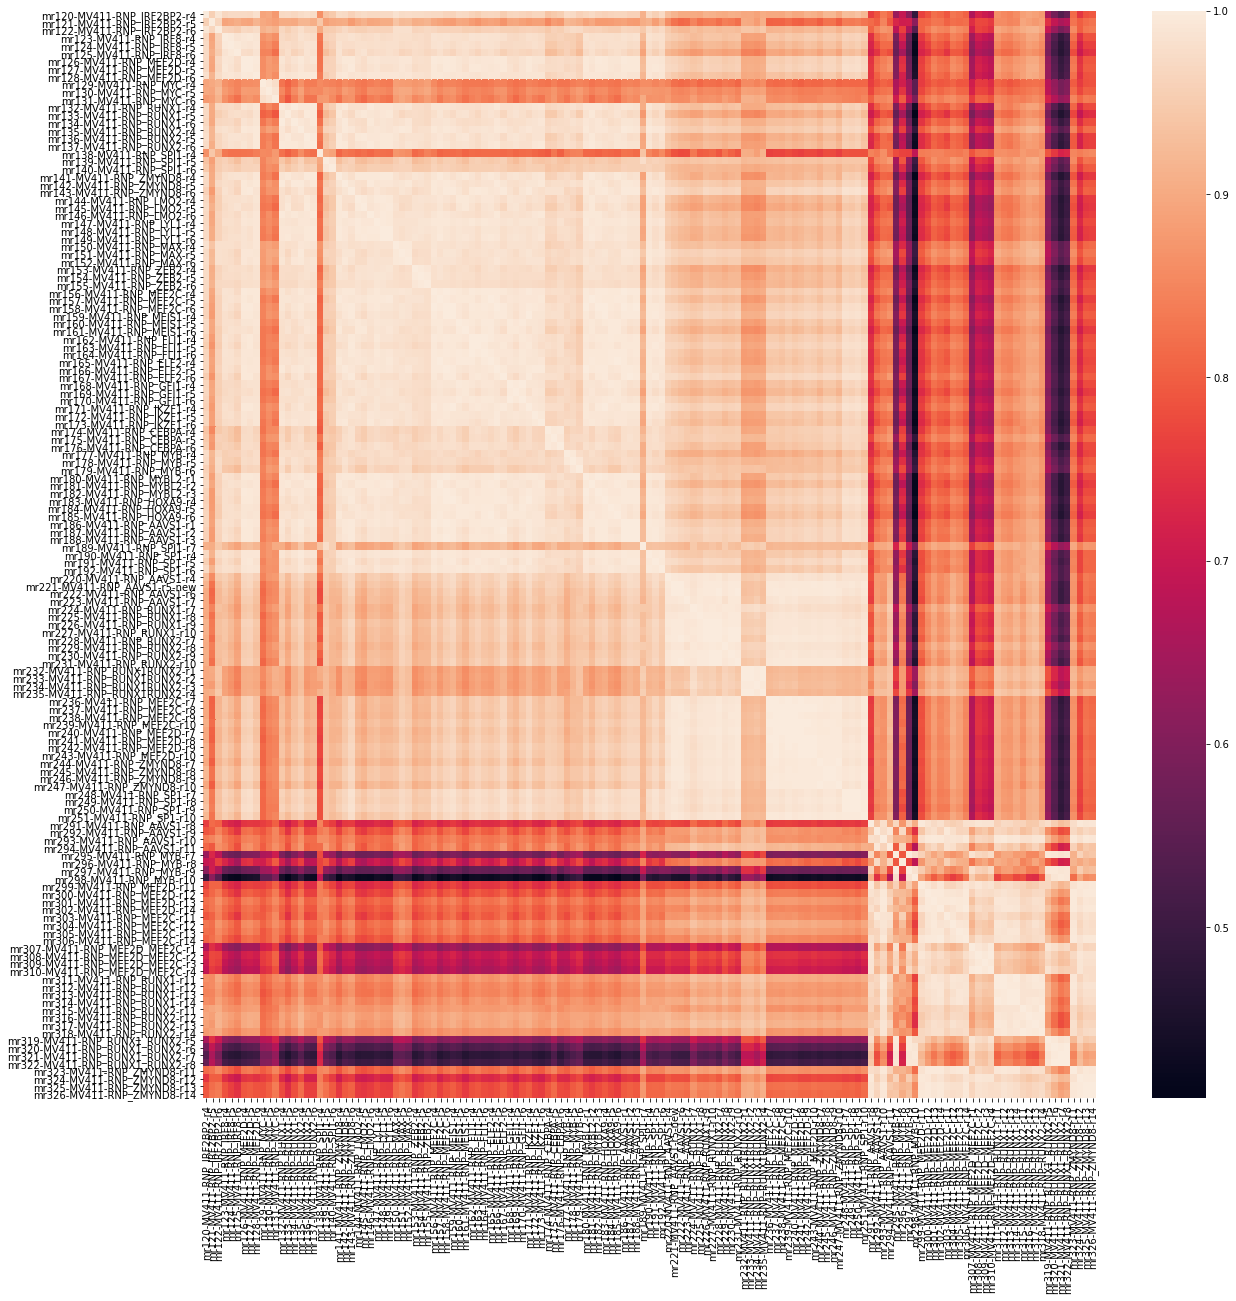

In [72]:
%matplotlib inline
ig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), 
            xticklabels=data.columns,
            yticklabels=data.columns, ax=ax)
plt.savefig('../results/'+project+'/plots/correlation_'+version+'.pdf')

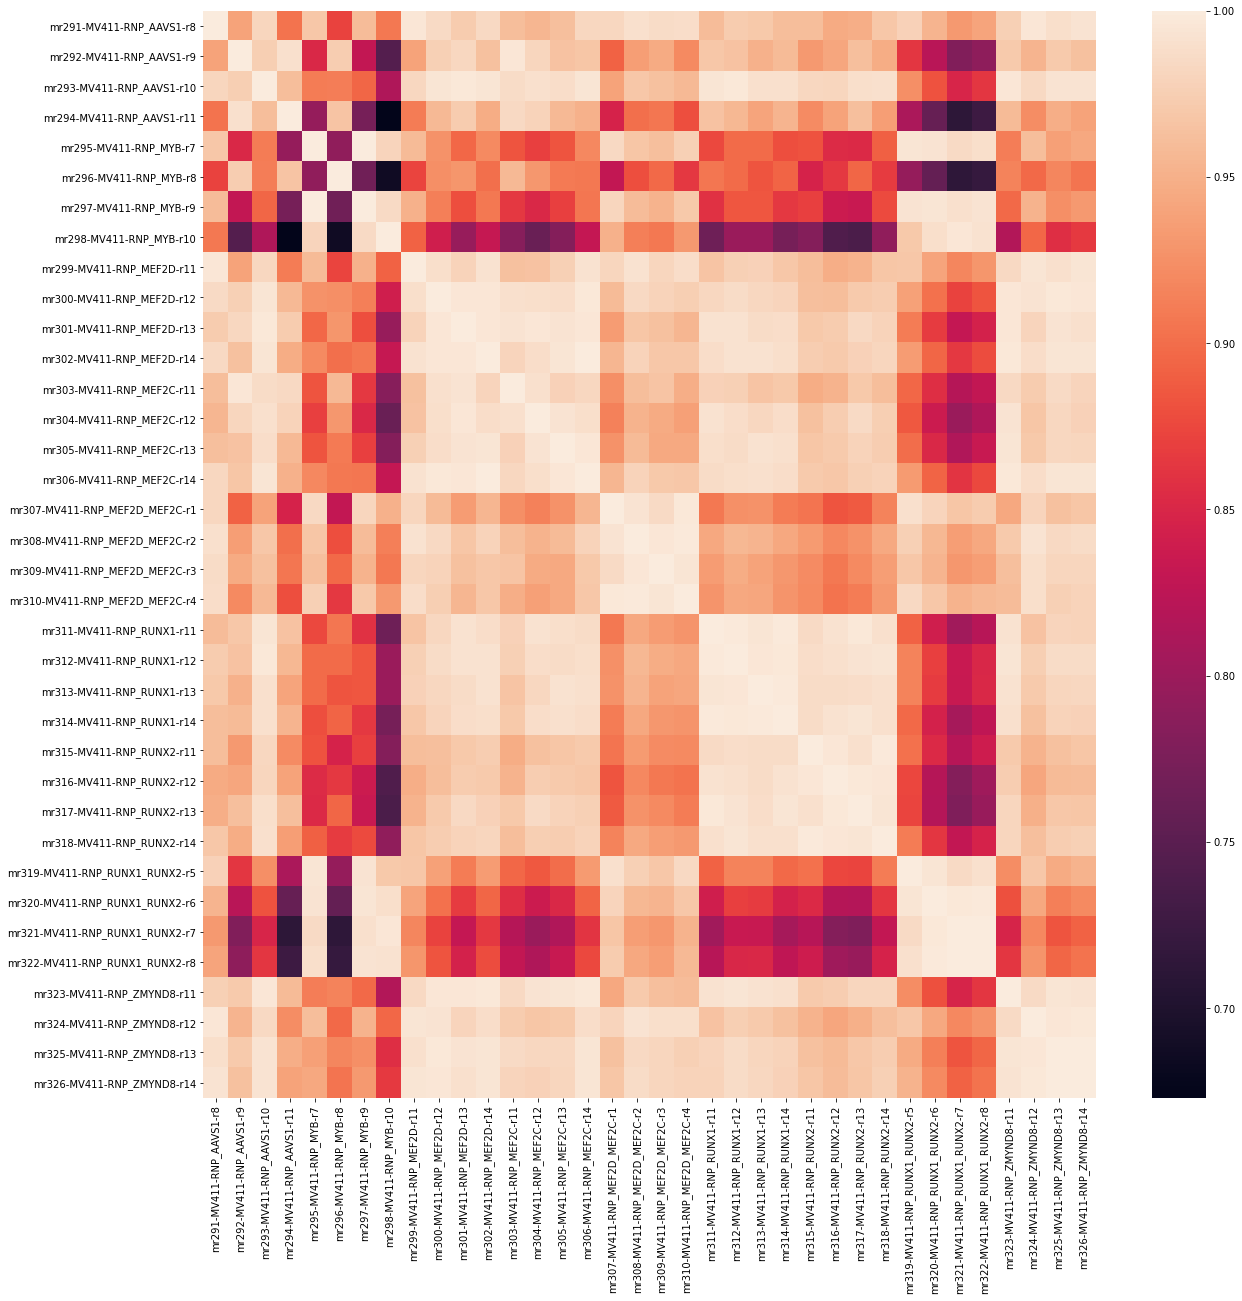

In [79]:
ig, ax = plt.subplots(figsize=(20,20))
subdata = data[data.columns[-36:]]
sns.heatmap(subdata.corr(), 
            xticklabels=subdata.columns,
            yticklabels=subdata.columns, ax=ax)
plt.savefig('../results/'+project+'/plots/correlation_'+version+'.pdf')

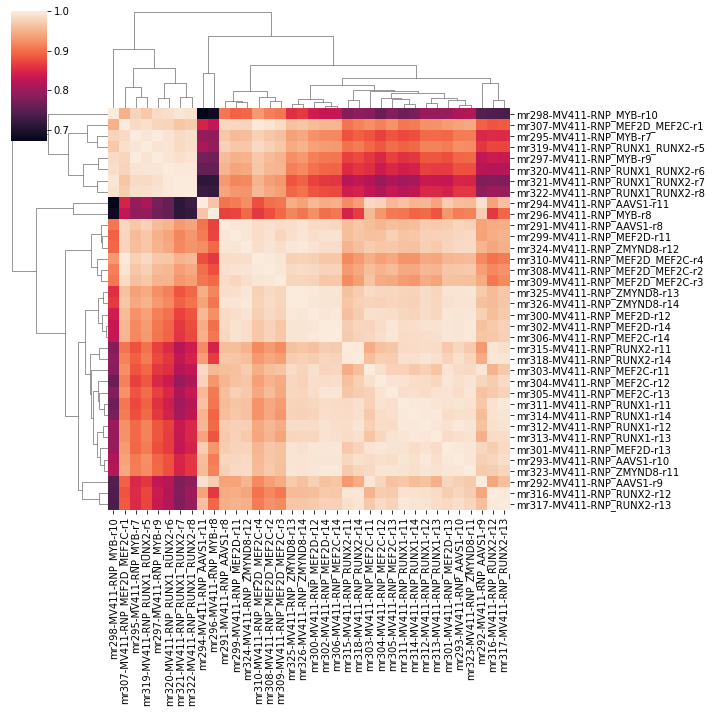

In [84]:
#ig, ax = plt.subplots(figsize=(20,20))
subdata = data[data.columns[-36:]]
sns.clustermap(subdata.corr(), 
            #xticklabels=subdata.columns,
            #yticklabels=subdata.columns, 
            #ax=ax
              )
#plt.savefig('../results/'+project+'/plots/correlation_'+version+'.pdf')

In [85]:
data.to_csv('../results/'+project+'/'+version+'_counts.csv')

In [ ]:
version="additionals"

In [ ]:
data = pd.read_csv('../results/'+project+'/'+version+'_counts.csv',index_col=0)

In [ ]:
%matplotlib inline
sns.clustermap(data.corr(), figsize=(20, 20))
plt.savefig('../results/'+project+'/plots/cluster_corr_count_'+version+'.pdf')

In [ ]:
data.sum().tolist()

In [ ]:
data.shape

#### WES REMOVE SPI1-r4 because it looks bad

In [86]:
data= data.drop(columns=['mr138-MV411-RNP_SPI1-r4'])
ERCC = ERCC.drop(columns=['mr138-MV411-RNP_SPI1-r4'])

In [ ]:
%matplotlib inline
sns.clustermap(data.corr(), figsize=(20, 20))
plt.savefig('../results/'+project+'/plots/cluster_corr_count_gene_removed_'+version+'.pdf')

## Making and running the dashboard

In [87]:
%%R
library('erccdashboard')

R[write to console]: Loading required package: ggplot2

R[write to console]: Learn more about the underlying theory at https://ggplot2-book.org/

R[write to console]: Loading required package: gridExtra

R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:Biobase’:

    combine


R[write to console]: The following object is masked from ‘package:BiocGenerics’:

    combine




In [88]:
ERCC = ERCC.astype(int)

In [91]:
sns.heatmap(np.log2(ERCC[ERCC.index.str.contains('ERCC-')][['mr186-MV411-RNP_AAVS1-r1', 'mr187-MV411-RNP_AAVS1-r2', 'mr188-MV411-RNP_AAVS1-r3','mr129-MV411-RNP_MYC-r4', 'mr189-MV411-RNP_SPI1-r4', 'mr120-MV411-RNP_IRF2BP2-r4']].values / ERCC[ERCC.index.str.contains('ERCC-')][['mr186-MV411-RNP_AAVS1-r1', 'mr187-MV411-RNP_AAVS1-r2', 'mr188-MV411-RNP_AAVS1-r3','mr129-MV411-RNP_MYC-r4', 'mr189-MV411-RNP_SPI1-r4', 'mr120-MV411-RNP_IRF2BP2-r4']].values.mean(0)+1))

KeyError: "['mr189-MV411-RNP_SPI1-r4'] not in index"

In [ ]:
experiments

In [96]:
a = data.columns.tolist()
a.sort()
ERCC = ERCC[a]

In [106]:
ERCC['Feature'] = ERCC.index

In [99]:
ERCC = ERCC[ERCC.columns[-37:]]

In [100]:
experiments = list(set([i.split('-')[2] for i in ERCC.columns[:-1]]))
experiments.remove("RNP_AAVS1")
experiments

['RNP_MEF2C',
 'RNP_MEF2D_MEF2C',
 'RNP_MEF2D',
 'RNP_RUNX1_RUNX2',
 'RNP_RUNX2',
 'RNP_MYB',
 'RNP_RUNX1',
 'RNP_ZMYND8']

In [101]:
#TODO: compute the mass from concentration
###################################################
### code chunk number 3: defineInputData
###################################################
%R datType = "count" # "count" for RNA-Seq data, "array" for microarray data
%R isNorm = F # flag to indicate if input expression measures are already normalized, default is FALSE 
%R -i project,version filenameRoot = paste("../",project,"/ERCCdashboard_",version, sep = "", collapse = NULL) # user defined filename prefix for results files
%R sample2Name = "AAVS1" # name for sample 2 in the experiment
%R erccmix = "Single" # name of ERCC mixture design, "RatioPair" is default
%R erccdilution = 1/100 # dilution factor used for Ambion spike-in mixtures
%R spikeVol = 1 # volume (in microliters) of diluted spike-in mixture added to total RNA mass
%R choseFDR = 0.1 # user defined false discovery rate (FDR), default is 0.05

array([0.1])

In [102]:
ERCC.columns

Index(['mr291-MV411-RNP_AAVS1-r8', 'mr292-MV411-RNP_AAVS1-r9',
       'mr293-MV411-RNP_AAVS1-r10', 'mr294-MV411-RNP_AAVS1-r11',
       'mr295-MV411-RNP_MYB-r7', 'mr296-MV411-RNP_MYB-r8',
       'mr297-MV411-RNP_MYB-r9', 'mr298-MV411-RNP_MYB-r10',
       'mr299-MV411-RNP_MEF2D-r11', 'mr300-MV411-RNP_MEF2D-r12',
       'mr301-MV411-RNP_MEF2D-r13', 'mr302-MV411-RNP_MEF2D-r14',
       'mr303-MV411-RNP_MEF2C-r11', 'mr304-MV411-RNP_MEF2C-r12',
       'mr305-MV411-RNP_MEF2C-r13', 'mr306-MV411-RNP_MEF2C-r14',
       'mr307-MV411-RNP_MEF2D_MEF2C-r1', 'mr308-MV411-RNP_MEF2D_MEF2C-r2',
       'mr309-MV411-RNP_MEF2D_MEF2C-r3', 'mr310-MV411-RNP_MEF2D_MEF2C-r4',
       'mr311-MV411-RNP_RUNX1-r11', 'mr312-MV411-RNP_RUNX1-r12',
       'mr313-MV411-RNP_RUNX1-r13', 'mr314-MV411-RNP_RUNX1-r14',
       'mr315-MV411-RNP_RUNX2-r11', 'mr316-MV411-RNP_RUNX2-r12',
       'mr317-MV411-RNP_RUNX2-r13', 'mr318-MV411-RNP_RUNX2-r14',
       'mr319-MV411-RNP_RUNX1_RUNX2-r5', 'mr320-MV411-RNP_RUNX1_RUNX2-r6',
       '

In [109]:
experiments

['RNP_MEF2C',
 'RNP_MEF2D_MEF2C',
 'RNP_MEF2D',
 'RNP_RUNX1_RUNX2',
 'RNP_RUNX2',
 'RNP_MYB',
 'RNP_RUNX1',
 'RNP_ZMYND8']

In [110]:
cols

['Feature',
 'mr291-MV411-RNP_AAVS1-r8',
 'mr292-MV411-RNP_AAVS1-r9',
 'mr293-MV411-RNP_AAVS1-r10',
 'mr294-MV411-RNP_AAVS1-r11',
 'mr295-MV411-RNP_MYB-r7',
 'mr296-MV411-RNP_MYB-r8',
 'mr297-MV411-RNP_MYB-r9',
 'mr298-MV411-RNP_MYB-r10',
 'mr299-MV411-RNP_MEF2D-r11',
 'mr300-MV411-RNP_MEF2D-r12',
 'mr301-MV411-RNP_MEF2D-r13',
 'mr302-MV411-RNP_MEF2D-r14',
 'mr303-MV411-RNP_MEF2C-r11',
 'mr304-MV411-RNP_MEF2C-r12',
 'mr305-MV411-RNP_MEF2C-r13',
 'mr306-MV411-RNP_MEF2C-r14',
 'mr307-MV411-RNP_MEF2D_MEF2C-r1',
 'mr308-MV411-RNP_MEF2D_MEF2C-r2',
 'mr309-MV411-RNP_MEF2D_MEF2C-r3',
 'mr310-MV411-RNP_MEF2D_MEF2C-r4',
 'mr311-MV411-RNP_RUNX1-r11',
 'mr312-MV411-RNP_RUNX1-r12',
 'mr313-MV411-RNP_RUNX1-r13',
 'mr314-MV411-RNP_RUNX1-r14',
 'mr315-MV411-RNP_RUNX2-r11',
 'mr316-MV411-RNP_RUNX2-r12',
 'mr317-MV411-RNP_RUNX2-r13',
 'mr318-MV411-RNP_RUNX2-r14',
 'mr319-MV411-RNP_RUNX1_RUNX2-r5',
 'mr320-MV411-RNP_RUNX1_RUNX2-r6',
 'mr321-MV411-RNP_RUNX1_RUNX2-r7',
 'mr322-MV411-RNP_RUNX1_RUNX2-r8',
 

In [113]:
experiments

['RNP_MEF2C',
 'RNP_MEF2D_MEF2C',
 'RNP_MEF2D',
 'RNP_RUNX1_RUNX2',
 'RNP_RUNX2',
 'RNP_MYB',
 'RNP_RUNX1',
 'RNP_ZMYND8']

rm: cannot remove '../results/RNPv2/ercc_v4_MEF2C.AAVS1.All.Pvals.csv': No such file or directory
[1] "MEF2C"
[1] "AAVS1"
   Feature MEF2C_1 MEF2C_2 MEF2C_3 MEF2C_4 AAVS1_0 AAVS1_1 AAVS1_2 AAVS1_3
1   TSPAN6       0       0       0       0       0       0       0       0
2     TNMD       0       0       0       0       0       0       0       0
3     DPM1    1120    1878     959    1074    1017    1525    1658    1895
4    SCYL3     152     243     183     147     107     155     185     224
5 C1orf112     425     713     437     349     383     424     526     536
6      FGR     399     651     551     547     403     391     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.MEF2C.AAVS1 

Transcripts were removed with a mean count < 1 or more than 2 
replicates with 0 counts.
Original data contained  27579 transcripts. 
After filtering  15656 transcripts remain for  analysis.
A total of 6 out of 92 

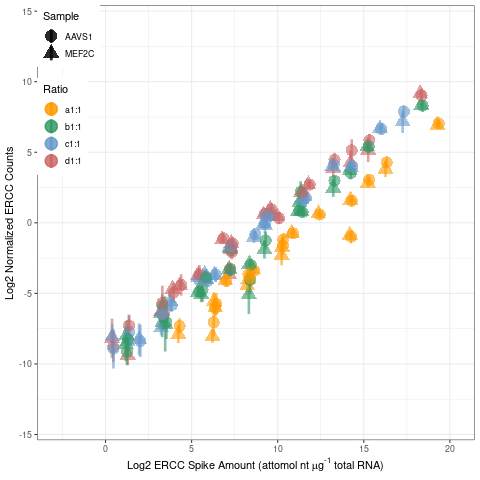

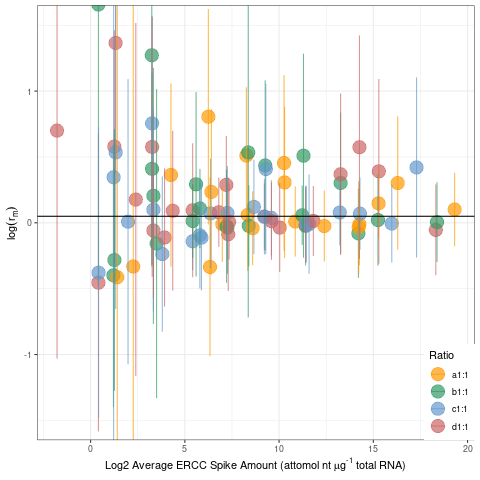

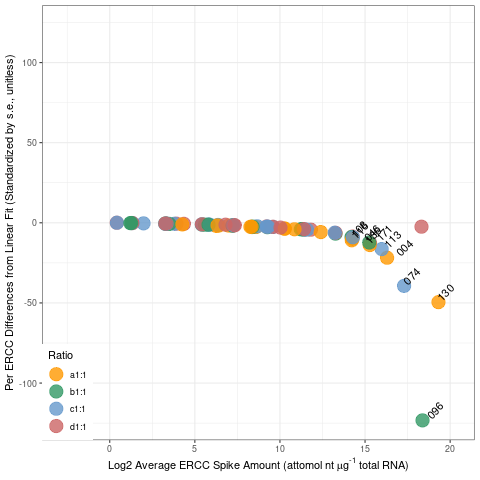

rm: cannot remove '../results/RNPv2/ercc_v4_MEF2DMEF2C.AAVS1.All.Pvals.csv': No such file or directory
[1] "MEF2DMEF2C"
[1] "AAVS1"
   Feature MEF2DMEF2C_1 MEF2DMEF2C_2 MEF2DMEF2C_3 MEF2DMEF2C_4 AAVS1_0 AAVS1_1
1   TSPAN6            0            0            0            0       0       0
2     TNMD            0            0            0            0       0       0
3     DPM1         1772          983          891          916    1017    1525
4    SCYL3          327          218          130          147     107     155
5 C1orf112          465          377          301          314     383     424
6      FGR         1606          853          673          742     403     391
  AAVS1_2 AAVS1_3
1       0       0
2       0       0
3    1658    1895
4     185     224
5     526     536
6     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.MEF2DMEF2C.AAVS1 

Transcripts were removed with a mean count < 

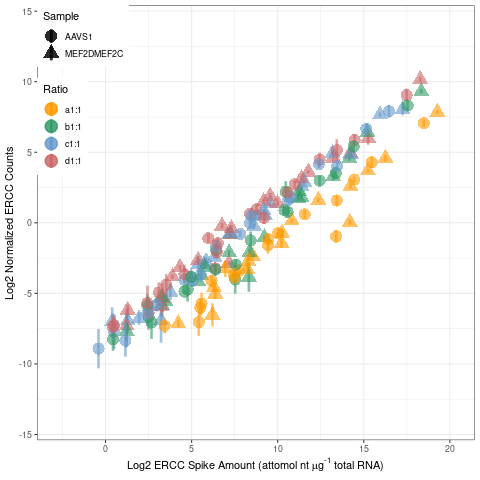

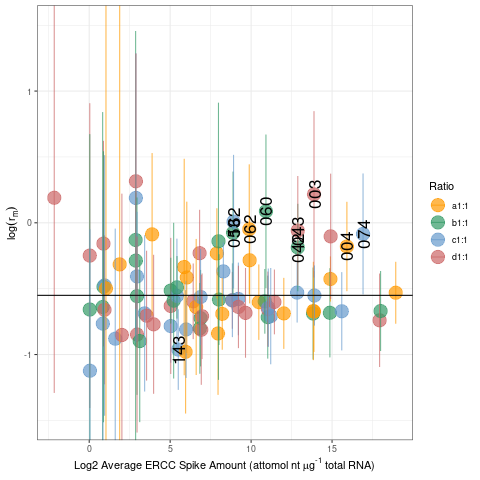

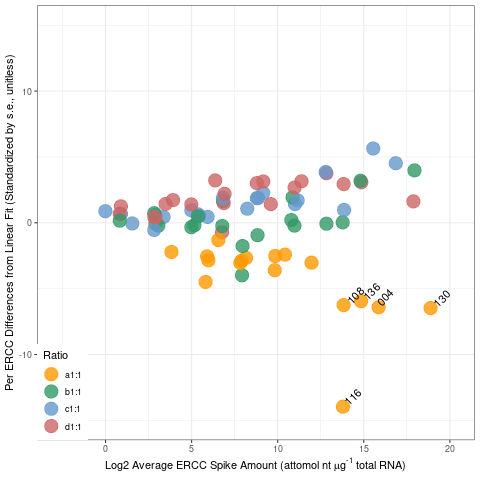

rm: cannot remove '../results/RNPv2/ercc_v4_MEF2D.AAVS1.All.Pvals.csv': No such file or directory
[1] "MEF2D"
[1] "AAVS1"
   Feature MEF2D_1 MEF2D_2 MEF2D_3 MEF2D_4 AAVS1_0 AAVS1_1 AAVS1_2 AAVS1_3
1   TSPAN6       0       0       0       0       0       0       0       0
2     TNMD       0       0       0       0       0       0       0       0
3     DPM1     866    1034    1302    1091    1017    1525    1658    1895
4    SCYL3     135     159     131     154     107     155     185     224
5 C1orf112     386     370     442     391     383     424     526     536
6      FGR     442     361     429     460     403     391     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.MEF2D.AAVS1 

Transcripts were removed with a mean count < 1 or more than 2 
replicates with 0 counts.
Original data contained  27579 transcripts. 
After filtering  15548 transcripts remain for  analysis.
A total of 7 out of 92 

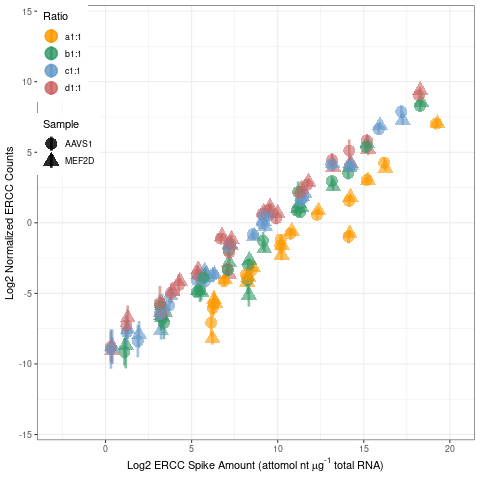

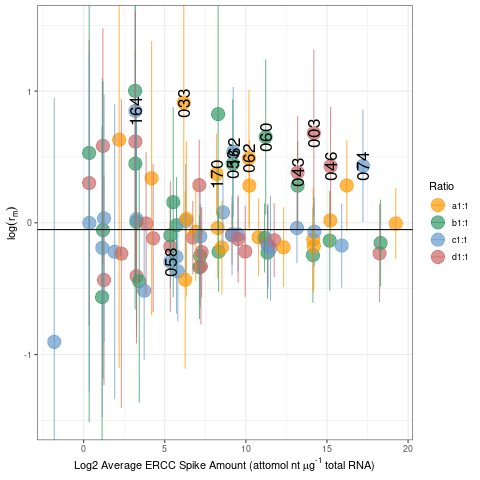

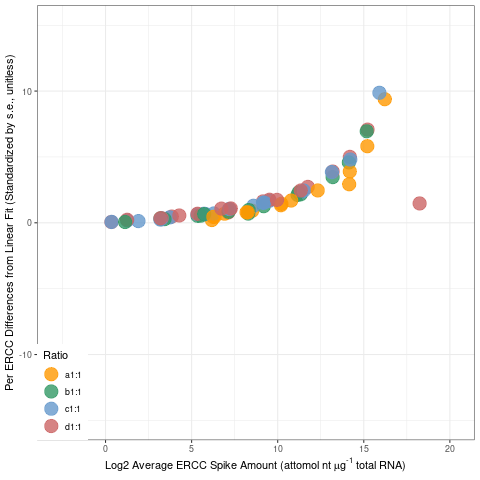

rm: cannot remove '../results/RNPv2/ercc_v4_RUNX1RUNX2.AAVS1.All.Pvals.csv': No such file or directory
[1] "RUNX1RUNX2"
[1] "AAVS1"
   Feature RUNX1RUNX2_1 RUNX1RUNX2_2 RUNX1RUNX2_3 RUNX1RUNX2_4 AAVS1_0 AAVS1_1
1   TSPAN6            0            0            0            0       0       0
2     TNMD            0            0            0            0       0       0
3     DPM1          574          370          497         1158    1017    1525
4    SCYL3          108           95           82          210     107     155
5 C1orf112          189          100          191          337     383     424
6      FGR          276          176          183          544     403     391
  AAVS1_2 AAVS1_3
1       0       0
2       0       0
3    1658    1895
4     185     224
5     526     536
6     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.RUNX1RUNX2.AAVS1 

Transcripts were removed with a mean count < 

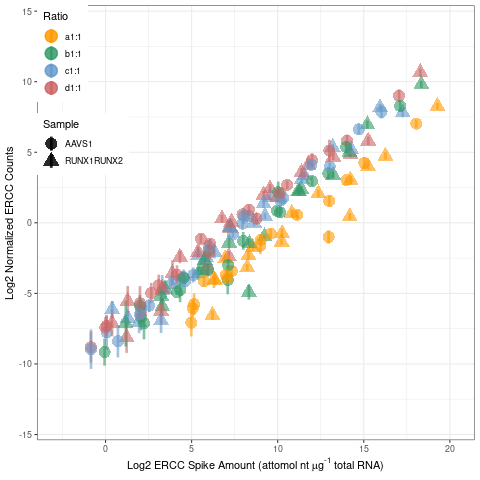

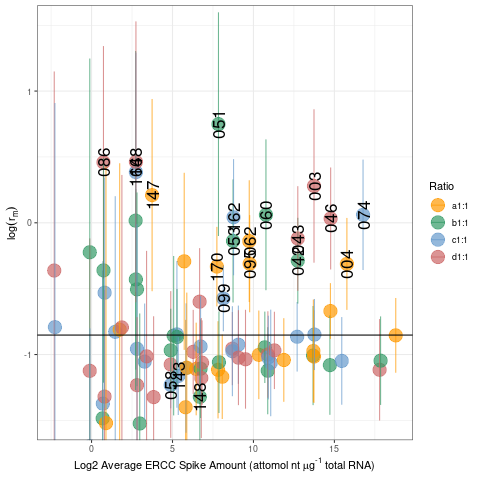

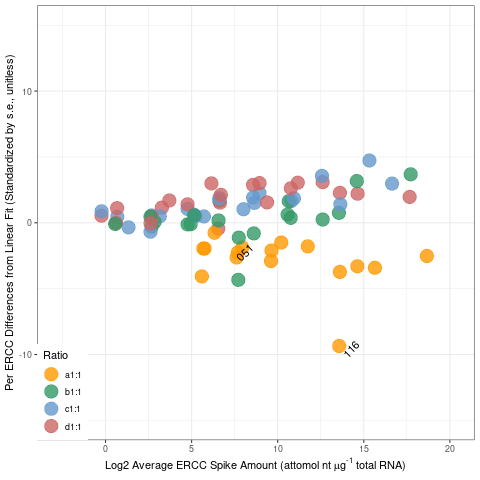

rm: cannot remove '../results/RNPv2/ercc_v4_RUNX2.AAVS1.All.Pvals.csv': No such file or directory
[1] "RUNX2"
[1] "AAVS1"
   Feature RUNX2_1 RUNX2_2 RUNX2_3 RUNX2_4 AAVS1_0 AAVS1_1 AAVS1_2 AAVS1_3
1   TSPAN6       0       0       0       0       0       0       0       0
2     TNMD       0       0       0       2       0       0       0       0
3     DPM1    1461    1494    1420    1584    1017    1525    1658    1895
4    SCYL3     194     205     175     210     107     155     185     224
5 C1orf112     655     600     454     550     383     424     526     536
6      FGR     475     426     400     514     403     391     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.RUNX2.AAVS1 

Transcripts were removed with a mean count < 1 or more than 2 
replicates with 0 counts.
Original data contained  27579 transcripts. 
After filtering  15625 transcripts remain for  analysis.
A total of 7 out of 92 

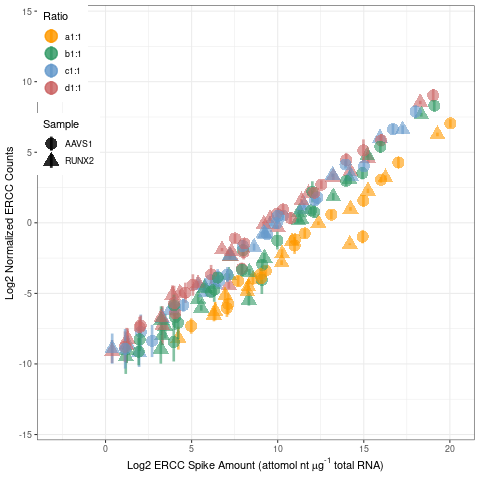

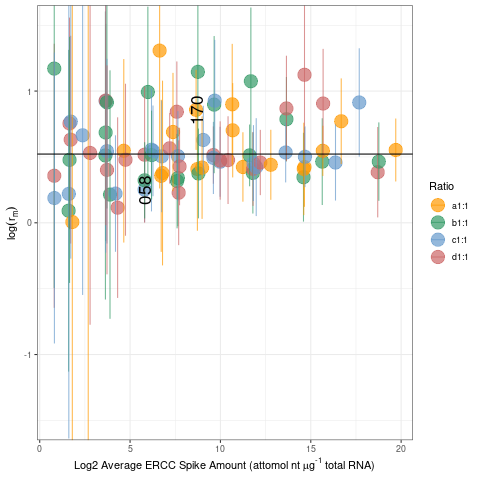

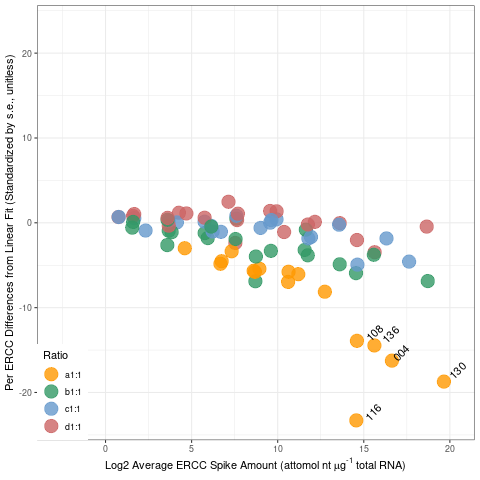

rm: cannot remove '../results/RNPv2/ercc_v4_MYB.AAVS1.All.Pvals.csv': No such file or directory
[1] "MYB"
[1] "AAVS1"
   Feature MYB_1 MYB_2 MYB_3 MYB_4 AAVS1_0 AAVS1_1 AAVS1_2 AAVS1_3
1   TSPAN6     0     0     0     0       0       0       0       0
2     TNMD     0     0     0     0       0       0       0       0
3     DPM1   927   346   755   716    1017    1525    1658    1895
4    SCYL3   195    37   141   114     107     155     185     224
5 C1orf112   322    82   291   233     383     424     526     536
6      FGR  1141   229  1003  1022     403     391     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.MYB.AAVS1 

Transcripts were removed with a mean count < 1 or more than 2 
replicates with 0 counts.
Original data contained  27579 transcripts. 
After filtering  15504 transcripts remain for  analysis.
A total of 5 out of 92 
ERCC controls were filtered from the data set
The excluded ER

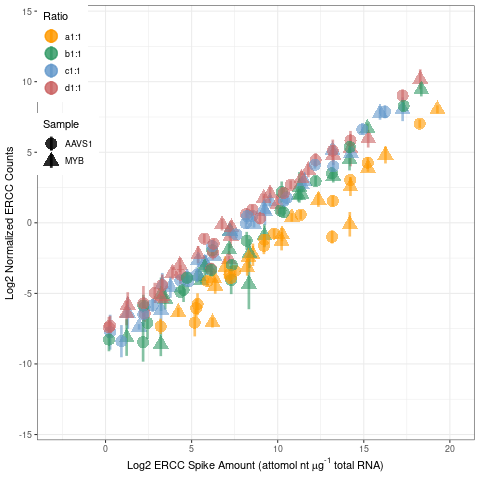

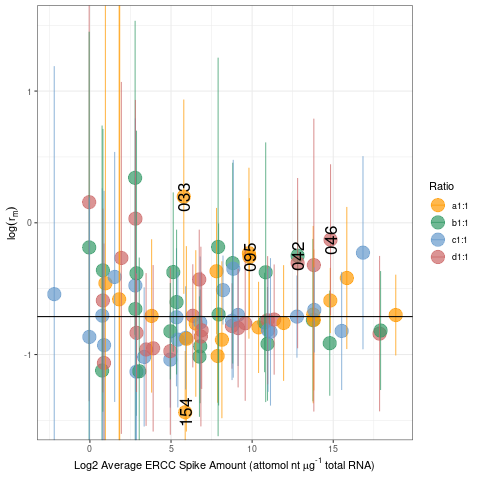

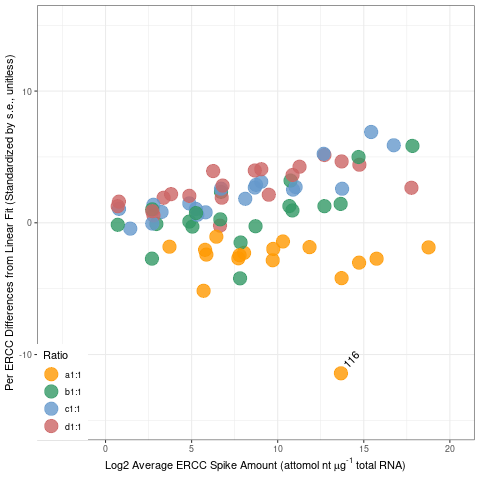

rm: cannot remove '../results/RNPv2/ercc_v4_RUNX1.AAVS1.All.Pvals.csv': No such file or directory
[1] "RUNX1"
[1] "AAVS1"
   Feature RUNX1_1 RUNX1_2 RUNX1_3 RUNX1_4 AAVS1_0 AAVS1_1 AAVS1_2 AAVS1_3
1   TSPAN6       0       0       0       0       0       0       0       0
2     TNMD       0       0       0       0       0       0       0       0
3     DPM1    1522    1321     973    1208    1017    1525    1658    1895
4    SCYL3     225     201     154     173     107     155     185     224
5 C1orf112     483     479     302     453     383     424     526     536
6      FGR     448     422     420     507     403     391     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.RUNX1.AAVS1 

Transcripts were removed with a mean count < 1 or more than 2 
replicates with 0 counts.
Original data contained  27579 transcripts. 
After filtering  15682 transcripts remain for  analysis.
A total of 8 out of 92 

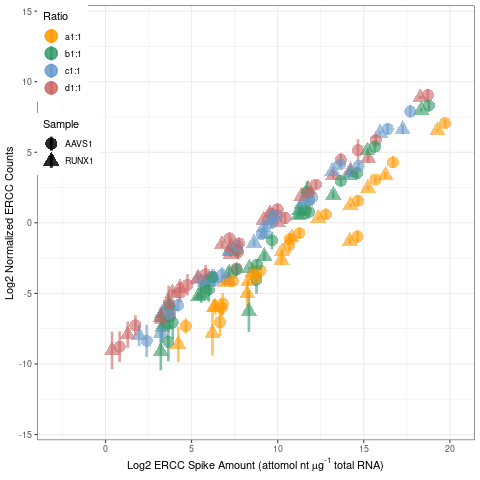

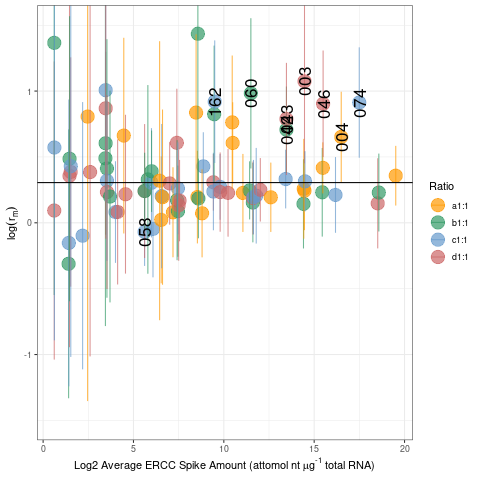

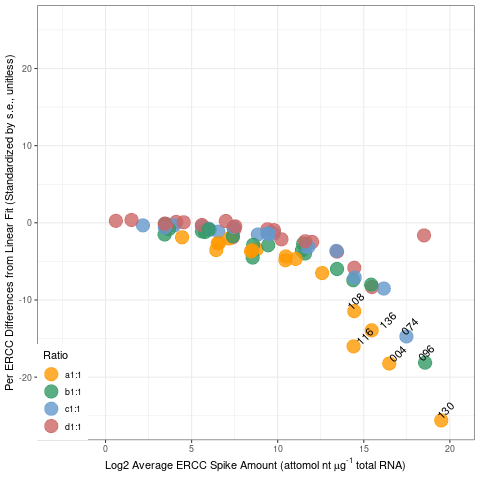

rm: cannot remove '../results/RNPv2/ercc_v4_ZMYND8.AAVS1.All.Pvals.csv': No such file or directory
[1] "ZMYND8"
[1] "AAVS1"
   Feature ZMYND8_1 ZMYND8_2 ZMYND8_3 ZMYND8_4 AAVS1_0 AAVS1_1 AAVS1_2 AAVS1_3
1   TSPAN6        0        0        0        0       0       0       0       0
2     TNMD        0        0        0        0       0       0       0       0
3     DPM1     1599     1114     1305     1297    1017    1525    1658    1895
4    SCYL3      260      181      180      205     107     155     185     224
5 C1orf112      526      405      420      429     383     424     526     536
6      FGR      980      697      848      987     403     391     521     360

Initializing the exDat list structure...
choseFDR = 0.1 
repNormFactor is NULL 
Filename root is: ../RNPv2/ERCCdashboard_v4.ZMYND8.AAVS1 

Transcripts were removed with a mean count < 1 or more than 2 
replicates with 0 counts.
Original data contained  27579 transcripts. 
After filtering  15665 transcripts remain for  an

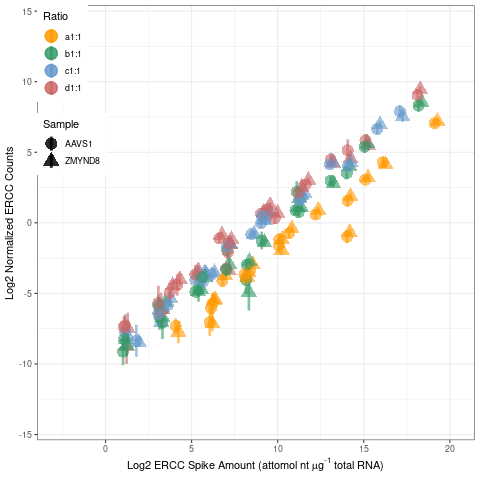

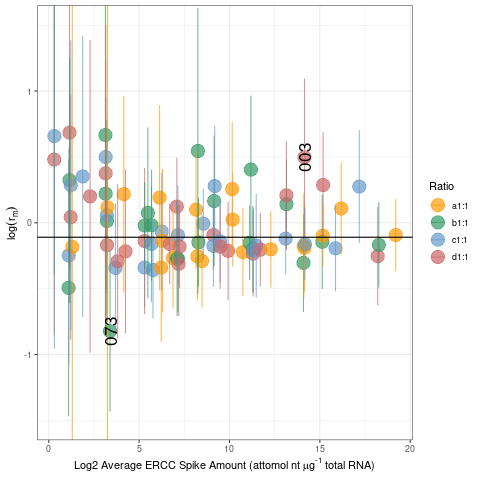

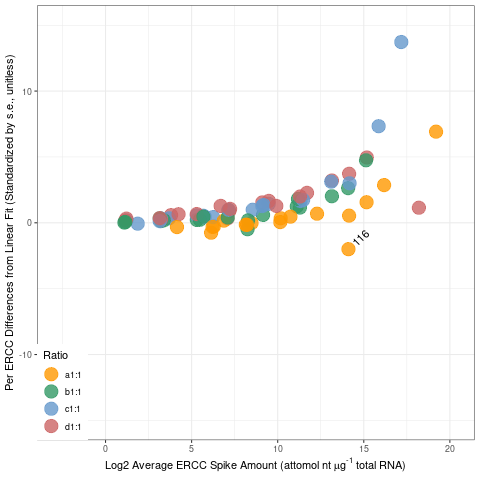

In [114]:
cols = list(ERCC.columns)
cols.sort()
res={}
for val in experiments:
    d = {}
    e=0
    d.update({
        'Feature':'Feature'
    })
    for i in cols[1:]:
        if val+'-' in i:
            e+=1
            d.update({i: ''.join(val.split('_')[1:])+'_'+str(e)})
    d.update({val:"AAVS1_"+str(i) for i, val in enumerate([val for val in ERCC.columns if "RNP_AAVS1" in val])})
    #if len(d)==6:
       # d.update({
       #     'mr188-MV411-RNP_AAVS1-r3': 'AAVS1_3'
       # })
    a = ERCC[list(d.keys())].rename(columns=d)
    a.to_csv('../data/ERCC_estimation.csv', index=None)
    val = ''.join(val.split('_')[1:])
    
    torm = '../results/'+project+'/ercc_'+version+'_'+val+'.AAVS1.All.Pvals.csv'
    ! rm $torm 
    %R -i val print(val)
    %R print(sample2Name)
    %R a <- read.csv('../data/ERCC_estimation.csv')
    %R print(head(a))
    %R exDat = ''
    %R totalRNAmass <- 0.5
    try:
        %R -i val exDat = initDat(datType = datType, isNorm = isNorm, exTable = a, filenameRoot = filenameRoot, sample1Name = val, sample2Name = sample2Name, erccmix = erccmix, erccdilution = erccdilution, spikeVol = spikeVol, totalRNAmass = totalRNAmass, choseFDR = choseFDR)
        %R exDat = est_r_m(exDat)
        %R exDat = dynRangePlot(exDat)
    except Warning:
        print("failed for "+val)
        continue
    except:
        print('worked for '+val)
    %R print(summary(exDat))
    %R grid.arrange(exDat$Figures$dynRangePlot)
    %R grid.arrange(exDat$Figures$r_mPlot)
    %R grid.arrange(exDat$Figures$rangeResidPlot)
    %R -o rm rm <- exDat$Results$r_m.res$r_m.mn
    %R -o se se <- exDat$Results$r_m.res$r_m.mnse
    res[val] = (rm[0],se[0])

In [ ]:
# number of cells are different --> need to correct for yields

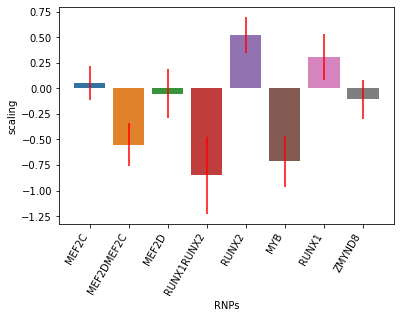

In [115]:
df= pd.DataFrame(data=res.values(),index=res.keys(), columns=['scaling','var'])
df['RNPs']=df.index
sns.barplot("RNPs","scaling",data=df,ci=None,)
plt.errorbar(x=range(0,len(df)),y=df['scaling'],
            yerr=df['var'], fmt='none', c= 'r')
plt.xticks(rotation=60,ha='right')
plt.savefig('../results/'+project+"/plots/"+version+"_scaling_fact_with_conf.pdf")

In [ ]:
scaling = res
scaling

In [ ]:
for i, v in scaling.items():
    if abs(v[0]) > 3*v[1]:
        print(i, v[0]) 

In [ ]:
ERCC[ERCC.index.str.contains('ERCC-')][[i for i in ERCC.columns if 'AAVS1' in i]].mean()

In [ ]:
ERCC[ERCC.index.str.contains('ERCC-')][[i for i in ERCC.columns if 'SPI1' in i]].mean()

In [ ]:
version="scaling_2" #additionals, scaling_2

In [ ]:
ls ../results/$project/*_scaling.json

In [ ]:
h.dictToFile(scaling,"../results/"+project+"/"+version+"_scaling.json")

In [ ]:
scaling = h.fileToDict("../results/"+project+"/"+version+"_scaling.json")

In [ ]:
scaling1= scaling

In [ ]:
scaling.update(scaling1)

In [ ]:
## we got those re-scalings from totalRNAmass/cellcounts. We needed it as spike ins were not added according to totRNAmass
rescaling = {'MYC':0.77,
'MYB':0.85}

for k, val in rescaling.items():
    if k in scaling:
        scaling[k][0]=np.log2((2**scaling[k][0])/val)

In [ ]:
scaling

## Differential expression analysis

In [ ]:
data['gene_id'] = data.index

In [ ]:
housekeeping = ["C1orf43", "CHMP2A", "EMC7", "GPI", "PSMB2", "PSMB4", "RAB7A", "REEP5", "SNRPD3", "VCP", "VPS29"]
# from https://www.cell.com/trends/genetics/pdf/S0168-9525(13)00089-9.pdf

#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4760967/ FOR CANCER CELL LINES
housekeeping2 = ['18S rRNA',
'ACTB',
'B2M',
'G6PD',
'GAPDH',
'GUSB',
'HMBS',
'HPRT1',
'PGK1',
'PPIA',
'RPL13a',
'SDHA',
'TBP',
'TUBB',
'YWHAZ']

In [ ]:
results = {}

In [ ]:
fulldata = data 

In [ ]:
fulldata.columns

In [ ]:
data = fulldata

In [ ]:
data = data[data.columns[:-33]]

In [ ]:
data = data[data.columns[-33:]]

In [ ]:
results.keys()

In [ ]:
data.columns

In [ ]:
experiments = list(set([i.split('-')[2] for i in data.columns[:-1]]))
experiments.remove("RNP_AAVS1")
experiments

In [ ]:
experiments = ['RNP_MYB','RNP_MYC','RNP_SPI1']

In [ ]:
rescaling = {i: 0.4 for i in experiments}

In [ ]:
keep=True
for val in experiments:  
    print(val)
    cond = [1 if val+'-' in i else 0 for i in data.columns[:-1]]
    contr = [1 if 'RNP_AAVS1' in i else 0 for i in data.columns[:-1]]
    design = pd.DataFrame(index=data.columns[:-1], columns=['DMSO','Target'], 
                          data=np.array([contr,cond]).T)
    design.index = design.index.astype(str).str.replace('-','.')
    deseq = pyDESeq2.pyDESeq2(count_matrix=data, design_matrix = design, 
                              design_formula='~DMSO + Target', gene_column="gene_id")
    if abs(scaling[val.split('_')[1]][0]) > 2*scaling[val.split('_')[1]][1]:
        print("estimating sizeFactors for this one")
        deseq.run_estimate_size_factors(controlGenes=data.gene_id.str.contains("ERCC-"))
        if val.split('_')[1] in rescaling:
            sizeFact = deseq.getSizeFactors()
            sizeFact[np.where(cond)[0]] *= rescaling[val.split('_')[1]]
            deseq.setSizeFactors(sizeFact)
    elif val in results and keep:
        continue
    deseq.run_deseq()
    deseq.get_deseq_result()
    r = deseq.deseq_result
    r.pvalue = np.nan_to_num(np.array(r.pvalue), 1)
    r.log2FoldChange = np.nan_to_num(np.array(r.log2FoldChange), 0)
    results[val] = r

### volcano plot with CRC members highlighted

In [ ]:
version

In [ ]:
experiments

In [ ]:
for val in experiments:
    a = h.volcano(results[val],tohighlight=ctf,title=val, maxvalue= 60, searchbox=True, showlabels=True,folder="../results/"+project+"/plots/"+version+'_')
    try:
        show(a)
    except RuntimeError:
        show(a)

In [ ]:
!mkdir ../results/$project/deseq_$version
for k, val in results.items(): 
    val.to_csv('../results/'+project+'/deseq_'+version+'/'+ k + '_scalingof' + str(scaling[k.split('_')[1]][0]+1.2 if abs(scaling[k.split('_')[1]][0]) > 2*scaling[k.split('_')[1]][1] else 0) + ".csv")

In [ ]:
version = "trial_all_rescaling" #additionals,scaling_2,additionals_unscaled

In [ ]:
results = {}
des = ! ls ../results/$project/deseq_$version/*.csv
for val in des:
    results["RNP_"+val.split('RNP_')[-1].split('.')[0]] = pd.read_csv(val,index_col=0)

## Making the csv file for max

In [ ]:
results.pop('RNP_all')

In [ ]:
ls ../results/$project/deseq_RNP_all_*

In [ ]:
tosave = pd.DataFrame(index=results['RNP_CEBPA'].index)
for k,v in results.items():
    tosave[k+'_fc_log2'] = v.log2FoldChange
    tosave[k+'_padj'] = v.padj
    tosave[k+'_pval'] = v.pvalue

In [ ]:
tosave.to_csv('../results/'+project+'/deseq_RNP_all_'+version+'.csv.gz')

## Looking at CRC members only

In [ ]:
ctf.extend(['IRF2BP2','MYBL2','IKZF1'])

## maybe use adjusted p_value

In [ ]:
deseq = pd.DataFrame(index=ctf)
for k, val in results.items():
    deseq[k] = [i.log2FoldChange if i.pvalue<0.05 else 0 for a, i in val.loc[ctf].iterrows()]

In [ ]:
deseq

In [ ]:
fig = sns.clustermap(figsize=(25,20), cmap=plt.cm.RdYlBu, data=deseq,vmin=-1,vmax=1,xticklabels=deseq.columns, yticklabels=deseq.index)
fig.savefig('../results/'+project+'/plots/clustermap_ctf_deseq_all_scaled_'+version+'.pdf')

In [ ]:
deseq.columns = [i.split('_')[1] for i in deseq.columns]
deseq = deseq.loc[deseq.columns]

In [ ]:
deseq.to_csv('../results/'+project+'/deseq_CTFmat'+version+'.csv')

In [ ]:
deseq = pd.read_csv('../results/'+project+'/deseq_CTFmat'+version+'.csv',index_col=0)

In [ ]:
net = nx.from_pandas_adjacency(((deseq < -0.3) | (deseq > 0.3)).T,create_using=nx.DiGraph)

In [ ]:
pos = nx.nx_agraph.graphviz_layout(net, prog="neato")

In [ ]:
colors = ['red' if deseq.loc[i[1],i[0]]> 0 else 'blue' for i in net.edges]

## blue is down, red is up

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(net,pos,with_labels=True,edge_color=colors)
plt.show()
plt.savefig("../results/"+project+"/plots/"+version+"_interaction_graph_binary.pdf")

In [ ]:
deseq[(deseq > -0.3) & (deseq < 0.3)]=0
net = nx.from_pandas_adjacency(deseq.T,create_using=nx.DiGraph)

In [ ]:
pos = nx.nx_agraph.graphviz_layout(net, prog='dot')

In [ ]:
colors = [-deseq.loc[i[1],i[0]] for i in net.edges]

In [ ]:
colors = [i/-min(colors) if i <0 else i/max(colors) for i in colors]

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(net,pos,with_labels=True, edge_color=colors,edge_cmap=plt.cm.RdYlBu)
plt.show()
plt.savefig("../results/"+project+"/plots/"+version+"_interaction_graph_continuous.pdf")

## We are looking for bias in the data and the replicates

In [ ]:
col = {v:i for i, v in enumerate(set([i.split('-')[2] for i in data.columns[:-1]]))}

In [ ]:
red = PCA(2).fit_transform(data[data.columns[:-1]].T)
h.scatter(red, labels=data.columns[:-1], title="PCA plot across replicates", radi=60000, colors=[col[i.split('-')[2]] for i in data.columns[:-1]], folder= "../results/"+project+"/plots/"+version+"_")

In [ ]:
red = PCA(30).fit_transform(data[data.columns[:-1]].T)
red = TSNE(2,4).fit_transform(red)
h.scatter(red, labels=data.columns[:-1], title='TSNE plot across replicates', radi=10, colors=[col[i.split('-')[2]] for i in data.columns[:-1]], folder= "../results/"+project+"/plots/"+version+"_")

mr129-MYC-r4 seems weird

## GSEA analysis

In [ ]:
data

In [ ]:
res = {}

In [ ]:
experiments

In [ ]:
res

In [ ]:
for val in experiments:
    print(val)
    totest = data[[v for v in data.columns[:-1] if val+'-' in v or 'AAVS1' in v]]
    cls = ['Condition' if val+'-' in v else 'DMSO' for v in totest.columns]
    if abs(scaling[val.split('_')[1]][0]) > 3*scaling[val.split('_')[1]][1]:
        print("rescaling this one")
        cols = [i for i in totest.columns if val+'-' in i]
        totest[cols] = totest[cols]*(2**scaling[val.split('_')[1]][0])
    res[val] = gseapy.gsea(data=totest, gene_sets='WikiPathways_2013', 
                cls= cls, no_plot=False, processes=8)
    res[val].res2d['Term'] = [i for i in res[val].res2d.index]
    sns.barplot(data=res[val].res2d.iloc[:25], x="es", y="Term",
                hue_order="geneset_size").set_title(val)

In [ ]:
with open('../data/'+project+'/'+version+'_wikipathway_RNPv2', 'wb') as f:
    pickle.dump(res,f)

In [ ]:
with open('../data/'+project+'/'+version+'_wikipathway_RNPv2','rb') as f:
    res = pickle.load(f)

### Analysis on the wiki pathways geneset

In [ ]:
for val in experiments:
    res[val].res2d['Term'] = [i[3:].split('WP')[0] for i in res[val].res2d['Term']]
    a = sns.barplot(data=res[val].res2d.iloc[:25], x="es", y="Term",
                hue_order="geneset_size")
    a.set_title(val)
    a.figure.savefig('../results/'+ project+ '/plots/'+version + '_wikipathway_mainTerms.pdf')
    plt.show()

In [ ]:
a = set()
for k, val in res.items():
    a.update(set(val.res2d.index))
a = {i:[0]*len(res) for i in a}
for n,(k, val) in enumerate(res.items()):
    for i,v in val.res2d.iterrows():
        a[i][n] = v.es

In [ ]:
res = pd.DataFrame(a, index=res.keys())

In [ ]:
res.columns = [i[3:].split('WP')[0] for i in res.columns]

In [ ]:
res.index = [i.split('_')[1] for i in res.index]

In [ ]:
fig = sns.clustermap(figsize=(25,20), data=res,vmin=-1,vmax=1,xticklabels=res.columns, yticklabels=res.index)
fig.savefig("../results/"+project+"/"+version+"enriched_terms_scaled_gsea.pdf")

In [ ]:
res.to_csv('../results/'+project+'/'+version+'_wikipathway_gsea_matrix.csv')

In [ ]:
res = {}

In [ ]:
res.keys()

### Analysis on the entire set of pathways (biopathways)

In [ ]:
for i, val in enumerate(experiments):
    print(val)
    totest = data[[v for v in data.columns[:-1] if val+'-' in v or 'AAVS1' in v]]
    cls = ['Condition' if val+'-' in v else 'DMSO' for v in totest.columns]
    if abs(scaling[val.split('_')[1]][0]) > 3*scaling[val.split('_')[1]][1]:
        print("rescaling this one")
        cols = [i for i in totest.columns if val+'-' in i]
        totest[cols] = totest[cols]*(2**scaling[val.split('_')[1]][0])
    elif val in res:
        continue
    res[val] = gseapy.gsea(data=totest, gene_sets='GO_Biological_Process_2015', 
                cls= cls, no_plot=False, processes=8)
    res[val].res2d['Term'] = [i for i in res[val].res2d.index]
    plt.figure(i)
    a = sns.barplot(data=res[val].res2d.iloc[:25], x="es", y="Term",
                hue_order="geneset_size")
    a.set_title(val)
    a.figure.savefig('../results/'+ project+ '/plots/'+version + '_gobioproc2015_mainTerms_'+val+'.pdf')

In [ ]:
with open('../results/'+project+'/'+version+'_GO_Biological_Process_2015_RNPv2', 'wb') as f:
    pickle.dump(res,f)

In [ ]:
with open('../results/'+project+'/'+version+'_GO_Biological_Process_2015_RNPv2', 'wb') as f:
    res = pickle.load(f)

In [ ]:
for i, v in res.items():
    res[i].res2d['Term'] = [i.split('(GO')[0] for i in v.res2d['Term']]

creating matrices

In [ ]:
a = set()
for k, val in res.items():
    a.update(set(val.res2d.Term))
a = {i:[0]*len(res) for i in a}
for n,(k, val) in enumerate(res.items()):
    for i,v in val.res2d.iterrows():
        a[v.Term][n] = v.es
res = pd.DataFrame(a, index=res.keys())

In [ ]:
fig = sns.clustermap(figsize=(25,20), data=res,vmin=-1,vmax=1, yticklabels=res.index ,cmap=plt.cm.RdYlBu)
fig.savefig("../results/"+project+"/"+version+"enriched_terms_scaled_gsea_bioproc2015.pdf")

In [ ]:
model = DBSCAN(eps=0.5, min_samples=3, metric='euclidean')
labels = model.fit_predict(res)

In [ ]:
sort = labels.argsort()

### Correlation matrix across experiment on at the gene set level

In [ ]:
a = sns.clustermap(-res.T.corr(),cmap=plt.cm.RdYlBu,vmin=-1,vmax=1)
a.savefig("../results/"+project+"/plots/"+version+"_clustermap_over_bioproc2015_geneset.pdf")

In [ ]:
a = h.plotCorrelationMatrix(res.values[sort], res.index[sort].tolist(), interactive=True, title="correlation matrix over bioproc2015 gene sets", folder="../results/"+project+"/plots/"+version+"_")#,colors=[labels[i] for i in sort]) 

### similarity distance plot over the genesets 

In [ ]:
red = PCA(2).fit_transform(res)
h.scatter(red, labels=res.index, radi=1, colors=labels, title="PCA distance in geneset space", showlabels=True,folder="../results/"+project+"/plots/"+version+"_")

In [ ]:
red = TSNE(2,2).fit_transform(res)
h.scatter(red, labels=res.index, radi=9, colors=labels, title="TSNE distance in geneset space",showlabels=True,folder="../results/"+project+"/plots/"+version+"_")

In [ ]:
res.to_csv('../results/'+project+'/'+version+'_biopathway_gsea.csv')

In [ ]:
res = pd.read_csv('../results/'+project+'/'+version+'_biopathway_gsea.csv',index_col=0)

## Getting the correlation at the transcriptome level

In [ ]:
data = pd.DataFrame(index=results['RNP_SP1'].index.tolist())
for i, v in results.items():
    data[i]=v.log2FoldChange

In [ ]:
model = AgglomerativeClustering(n_clusters=8,linkage="average", 
                                affinity="cosine", compute_full_tree=True)
labels = model.fit_predict(data.values.T)
ii = itertools.count(data.values.shape[1])
tree = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in model.children_]
sort = labels.argsort()

In [ ]:
model = DBSCAN(eps=0.5, min_samples=3, metric='euclidean')
labels = model.fit_predict(data.values)

In [ ]:
a = sns.clustermap(data.corr())
a.savefig("../results/"+project+"/plots/"+version+"_clustermap_correlation_transcriptome.pdf")

In [ ]:
a = h.plotCorrelationMatrix(data.values.T[sort], data.columns[sort].tolist(), interactive=True, title="transcriptome correlation",folder= "../results/"+project+"/plots/"+version+"_")#,colors=[labels[i] for i in sort]) 

In [ ]:
## Filtered version (set to 0 genes with low p_value)

In [ ]:
data = pd.DataFrame(index=results['RNP_SP1'].index.tolist())
for i, v in results.items():
    v.loc[v[v.pvalue>0.01].index,"log2FoldChange"]==0
    data[i]=v.log2FoldChange

In [ ]:
a = h.plotCorrelationMatrix(data.values.T[sort], data.columns[sort].tolist(), interactive=True, title="transcriptome correlation matrix over high pvalue genes",folder="../results/"+project+"/plots/"+version+"_")

In [ ]:
mostvar = data[(~data.index.str.contains('ERCC-')) & (data.var(1)>4)]

In [ ]:
a = sns.clustermap(-mostvar.corr(), cmap=plt.cm.RdYlBu, vmin=-1, vmax=1)
a.savefig("../results/"+project+"/plots/"+version+"_clustermap_mostvariable_genes.pdf")

### Doing it at the CRC members' expression only

In [ ]:
results_ctf = data.loc[set(['MYC',
 'MYB',
 'SPI1',
 'RUNX1',
 'IRF2BP2',
 'FLI1',
 'ELF2',
 'ZEB2',
 'GFI1',
 'LMO2',
 'CEBPa',
 'MEF2D',
 'MEF2C',
 'IRF8',
 'MEIS1',
 'RUNX2',
 'ZMYND8']) & set(data.index)].T
model = AgglomerativeClustering(n_clusters=7,linkage="average", 
                                affinity="cosine", compute_full_tree=True)
labels = model.fit_predict(results_ctf)
ii = itertools.count(results_ctf.shape[0])
tree = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in model.children_]
sort = labels.argsort()
h.plotCorrelationMatrix(results_ctf.values[sort], title="correlation matrix over similarity over CRC members aggregated with agglomerative clustering", folder="../results/"+project+'/plots/'+version+'_',names=results_ctf.index[sort].tolist(),interactive=True)

In [ ]:
a = sns.clustermap(results_ctf.corr())
a.set_title("clustermap of correlation matrix over similarity over CRC members")
a.figure.savefig('../results/'+project+'/plots/'+version+"_clustermap_correlation_CRConly.pdf")

In [ ]:
a.fig.savefig('../results/'+project+'/plots/'+version+"_pairplot_deseq_crconly.pdf")

In [ ]:
a = sns.pairplot(results_ctf.T)
a.fig.suptitle("pairplot of differential expression of CRC members under RNP of these members", y=1.08)
